<a href="https://colab.research.google.com/github/imusicmash/learning-langgraph/blob/main/learning_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# intro to langgraph
# https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141

In [12]:
!pip install langgraph

from langchain_core.tools import tool
#from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage, add_messages
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.6 MB/s eta 0:00:00


In [13]:
from typing import Dict, TypedDict, Optional
class GraphState(TypedDict):
    question: Optional[str] = None
    classification: Optional[str] = None
    response: Optional[str] = None

In [14]:
from langgraph.graph import StateGraph
workflow = StateGraph(GraphState)

In [15]:
def classify_input_node(state):
    question = state.get('question', '').strip()
    classification = classify(question)  # Assume a function that classifies the input
    return {"classification": classification}
def handle_greeting_node(state):
    return {"response": "Hello! How can I help you today?"}
def handle_search_node(state):
    question = state.get('question', '').strip()
    search_result = f"Search result for '{question}'"
    return {"response": search_result}

In [16]:
workflow.add_node("classify_input", classify_input_node)
workflow.add_node("handle_greeting", handle_greeting_node)
workflow.add_node("handle_search", handle_search_node)

def decide_next_node(state):
    return "handle_greeting" if state.get('classification') == "greeting" else "handle_search"
workflow.add_conditional_edges(
    "classify_input",
    decide_next_node,
    {
        "handle_greeting": "handle_greeting",
        "handle_search": "handle_search"
    }
)

In [25]:
from langgraph.graph import END, START, StateGraph



In [26]:
workflow.set_entry_point("classify_input")
#END = "END"
workflow.add_edge('handle_greeting', END)
workflow.add_edge('handle_search', END)

In [27]:
app = workflow.compile()
inputs = {"question": "Hello, how are you?"}
result = app.invoke(inputs)
print(result)

ValueError: Found edge ending at unknown node `END`

In [ ]:
# another example
# https://blog.madhukaraphatak.com/exploring-langgraph-part-1

In [1]:
!pip install -U langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.8 MB/s eta 0:00:00


In [2]:
from langgraph.graph import MessagesState

# use a type hint, the function expects an argument named state and this should be an instance of MessagesState class

def hello_world_agent(state:MessagesState):
    return {"messages":["hello world. i love you"]}


In [7]:
from langgraph.graph import END, START, StateGraph

graph_builder = StateGraph(MessagesState)
graph_builder.add_node("hello_world_agent",hello_world_agent)

graph_builder.add_edge(START,"hello_world_agent")
graph_builder.add_edge("hello_world_agent",END)

In [8]:
graph = graph_builder.compile()

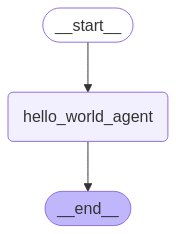

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [10]:
for event in graph.stream({"messages": ["apples"]}):
    for value in event.values():
        print(value)

{'messages': ['hello world. i love you']}
